In [15]:
import pandas as pd
import matplotlib.pyplot as plt

Data retrive

In [16]:
df = pd.read_csv("./data/house_price.csv")

Data Exploring

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Square_Footage        1000 non-null   int64  
 1   Num_Bedrooms          1000 non-null   int64  
 2   Num_Bathrooms         1000 non-null   int64  
 3   Year_Built            1000 non-null   int64  
 4   Lot_Size              1000 non-null   float64
 5   Garage_Size           1000 non-null   int64  
 6   Neighborhood_Quality  1000 non-null   int64  
 7   House_Price           1000 non-null   float64
dtypes: float64(2), int64(6)
memory usage: 62.6 KB


In [18]:
df.describe()

,Square_Footage,Num_Bedrooms,Num_Bathrooms,Year_Built,Lot_Size,Garage_Size,Neighborhood_Quality,House_Price
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1.000000e+03
mean,2815.422000,2.990000,1.973000,1986.550000,2.778087,1.022000,5.615000,6.188610e+05
std,1255.514921,1.427564,0.820332,20.632916,1.297903,0.814973,2.887059,2.535681e+05
min,503.000000,1.000000,1.000000,1950.000000,0.506058,0.000000,1.000000,1.116269e+05
25%,1749.500000,2.000000,1.000000,1969.000000,1.665946,0.000000,3.000000,4.016482e+05
50%,2862.500000,3.000000,2.000000,1986.000000,2.809740,1.000000,6.000000,6.282673e+05
75%,3849.500000,4.000000,3.000000,2004.250000,3.923317,2.000000,8.000000,8.271413e+05
max,4999.000000,5.000000,3.000000,2022.000000,4.989303,2.000000,10.000000,1.108237e+06


EDA

In [19]:
import seaborn as sns

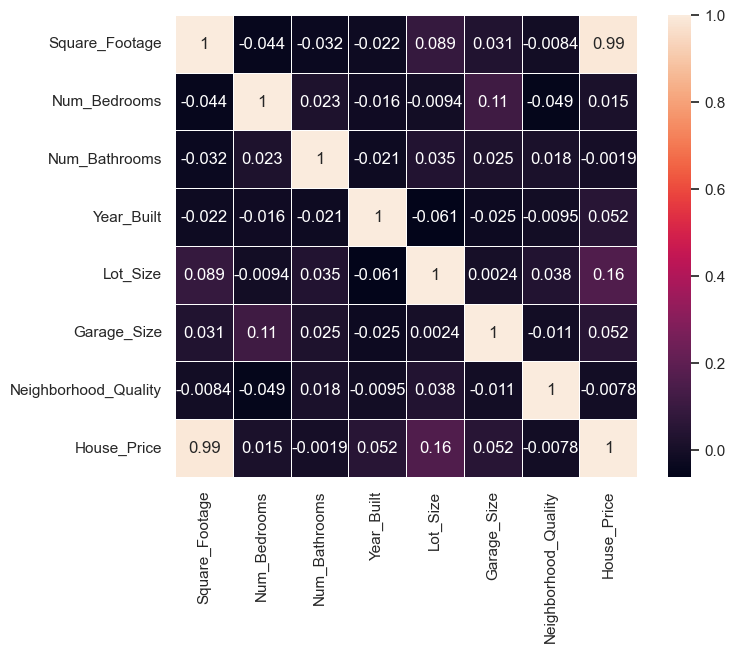

In [28]:
plt.figure(figsize=(8, 6))
sns.set_theme(style="darkgrid")
sns.heatmap(df.corr(),annot=True,  # Show correlation values
    cmap="rocket",  # Dark-themed colormap
    cbar=True,  # Show color bar
    linewidths=0.5,  # Add space between cells
    square=True)

plt.show()

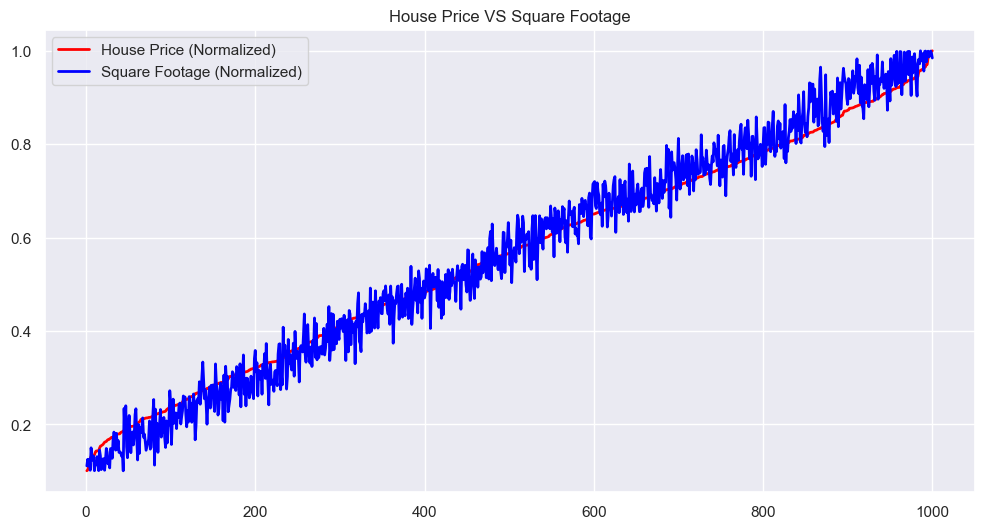

In [34]:
sorted_df = df.sort_values("House_Price")

sorted_df["House_Price_Normalized"] = sorted_df["House_Price"] / sorted_df["House_Price"].max()
sorted_df["Square_Footage_Normalized"] = sorted_df["Square_Footage"] / sorted_df["Square_Footage"].max()

plt.figure(figsize=(12, 6))
plt.title("House Price VS Square Footage")
plt.plot(range(1, 1001), sorted_df["House_Price_Normalized"], label="House Price (Normalized)", color="red", linestyle='-', linewidth=2)
plt.plot(range(1, 1001), sorted_df["Square_Footage_Normalized"], label="Square Footage (Normalized)", color="blue", linestyle='-', linewidth=2)
plt.legend()

plt.show()

Models  building

In [35]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [36]:
X = df[["Square_Footage"]]
y = df["House_Price"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [37]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [38]:
# Predict on test data
y_pred = model.predict(X_test)

# Coefficients and metrics
print("Intercept:", model.intercept_)
print("Slope:", model.coef_[0])
print("Mean Squared Error:", mean_squared_error(y_test, y_pred))
print("R-squared:", r2_score(y_test, y_pred))

Intercept: 54229.058595876675
Slope: 200.55687687000562
Mean Squared Error: 1081485546.488955
R-squared: 0.9832220800154357


Visualization

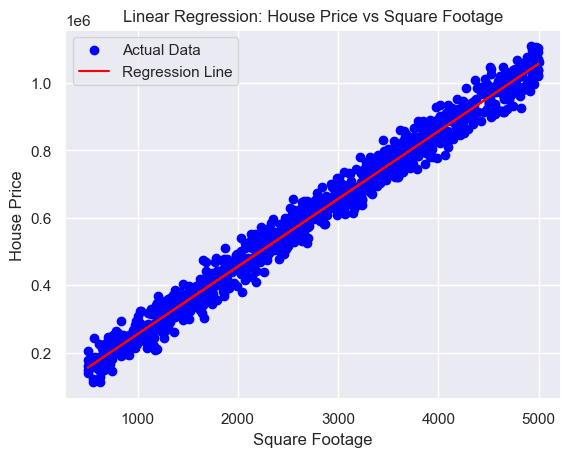

In [39]:
# Plot data and regression line
plt.scatter(X, y, color='blue', label='Actual Data')
plt.plot(X, model.predict(X), color='red', label='Regression Line')
plt.xlabel("Square Footage")
plt.ylabel("House Price")
plt.title("Linear Regression: House Price vs Square Footage")
plt.legend()
plt.show()